659it [00:00, 24796.10it/s]


episode	average_total_reward	reward_variance	max_total_reward	min_total_reward	average_depth_per_episode	max_depth_per_episode	min_depth_per_episode	actor_loss	critic_loss	hyper_actor_loss	behavior_loss
5830.0	5.580662432095862	1.4918054257402358	7.665710474481646	3.7983813443720735	7.09006620874468	9.019867549668874	5.490066225165563	-0.9166550666291192	0.08919380325700668	0.007599458483121796	5.173646053099475


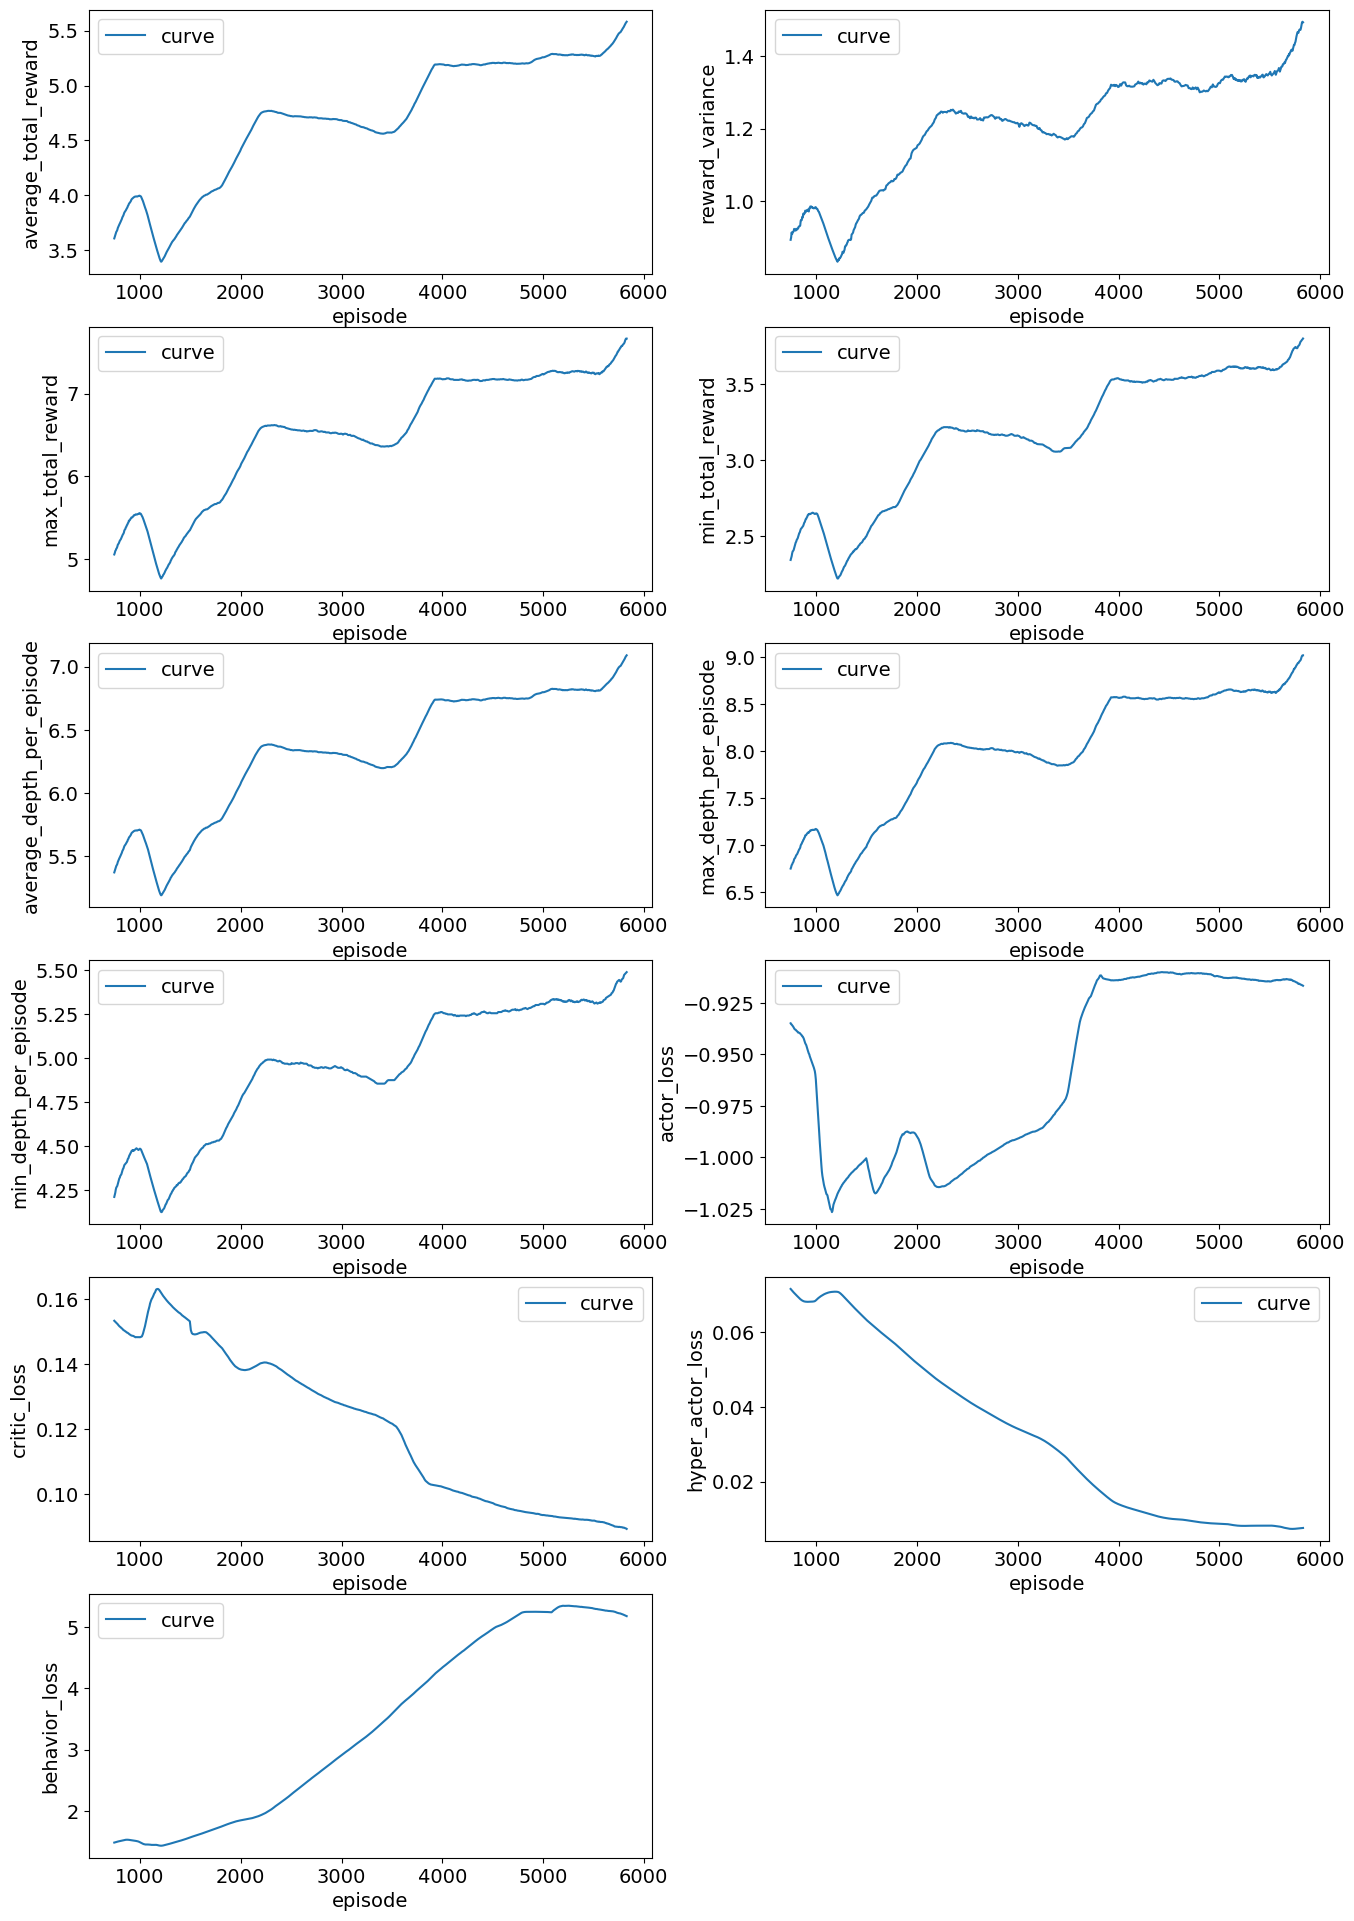

In [6]:
%matplotlib inline
from plot_utils import get_training_info, get_rl_training_info, plot_multiple_line, smooth
import numpy as np

smoothness = 300
expe = "hac_SASRec_actor0.0001_critic0.001_behave0_hacoef0.1_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed11"
log_path = "output/ml1m/agents/" + expe  + "/model.report"
info = get_rl_training_info(log_path, ['actor_loss', 'critic_loss', 'hyper_actor_loss', 'behavior_loss'])
for k in list(info.keys()):
    v = info[k]
    info[k] = smooth(np.array(v), smoothness)
print('\t'.join([k for k,v in info.items()]))
print('\t'.join([str(v[-1]) for k,v in info.items()]))
plot_multiple_line(["curve"], [info], x_name = 'episode')

5000it [00:00, 23780.87it/s]


episode	average_total_reward	reward_variance	max_total_reward	min_total_reward	average_depth_per_episode	max_depth_per_episode	min_depth_per_episode	actor_loss	critic_loss	hyper_actor_loss	behavior_loss
49240.0	9.519846073049584	3.1074839050801386	12.281751923213731	6.661295406076293	10.615231772921733	13.059602649006623	8.039735099337749	-0.9847274964613631	0.07249676210448047	3.0203541737498514e-05	0.40679678962325416


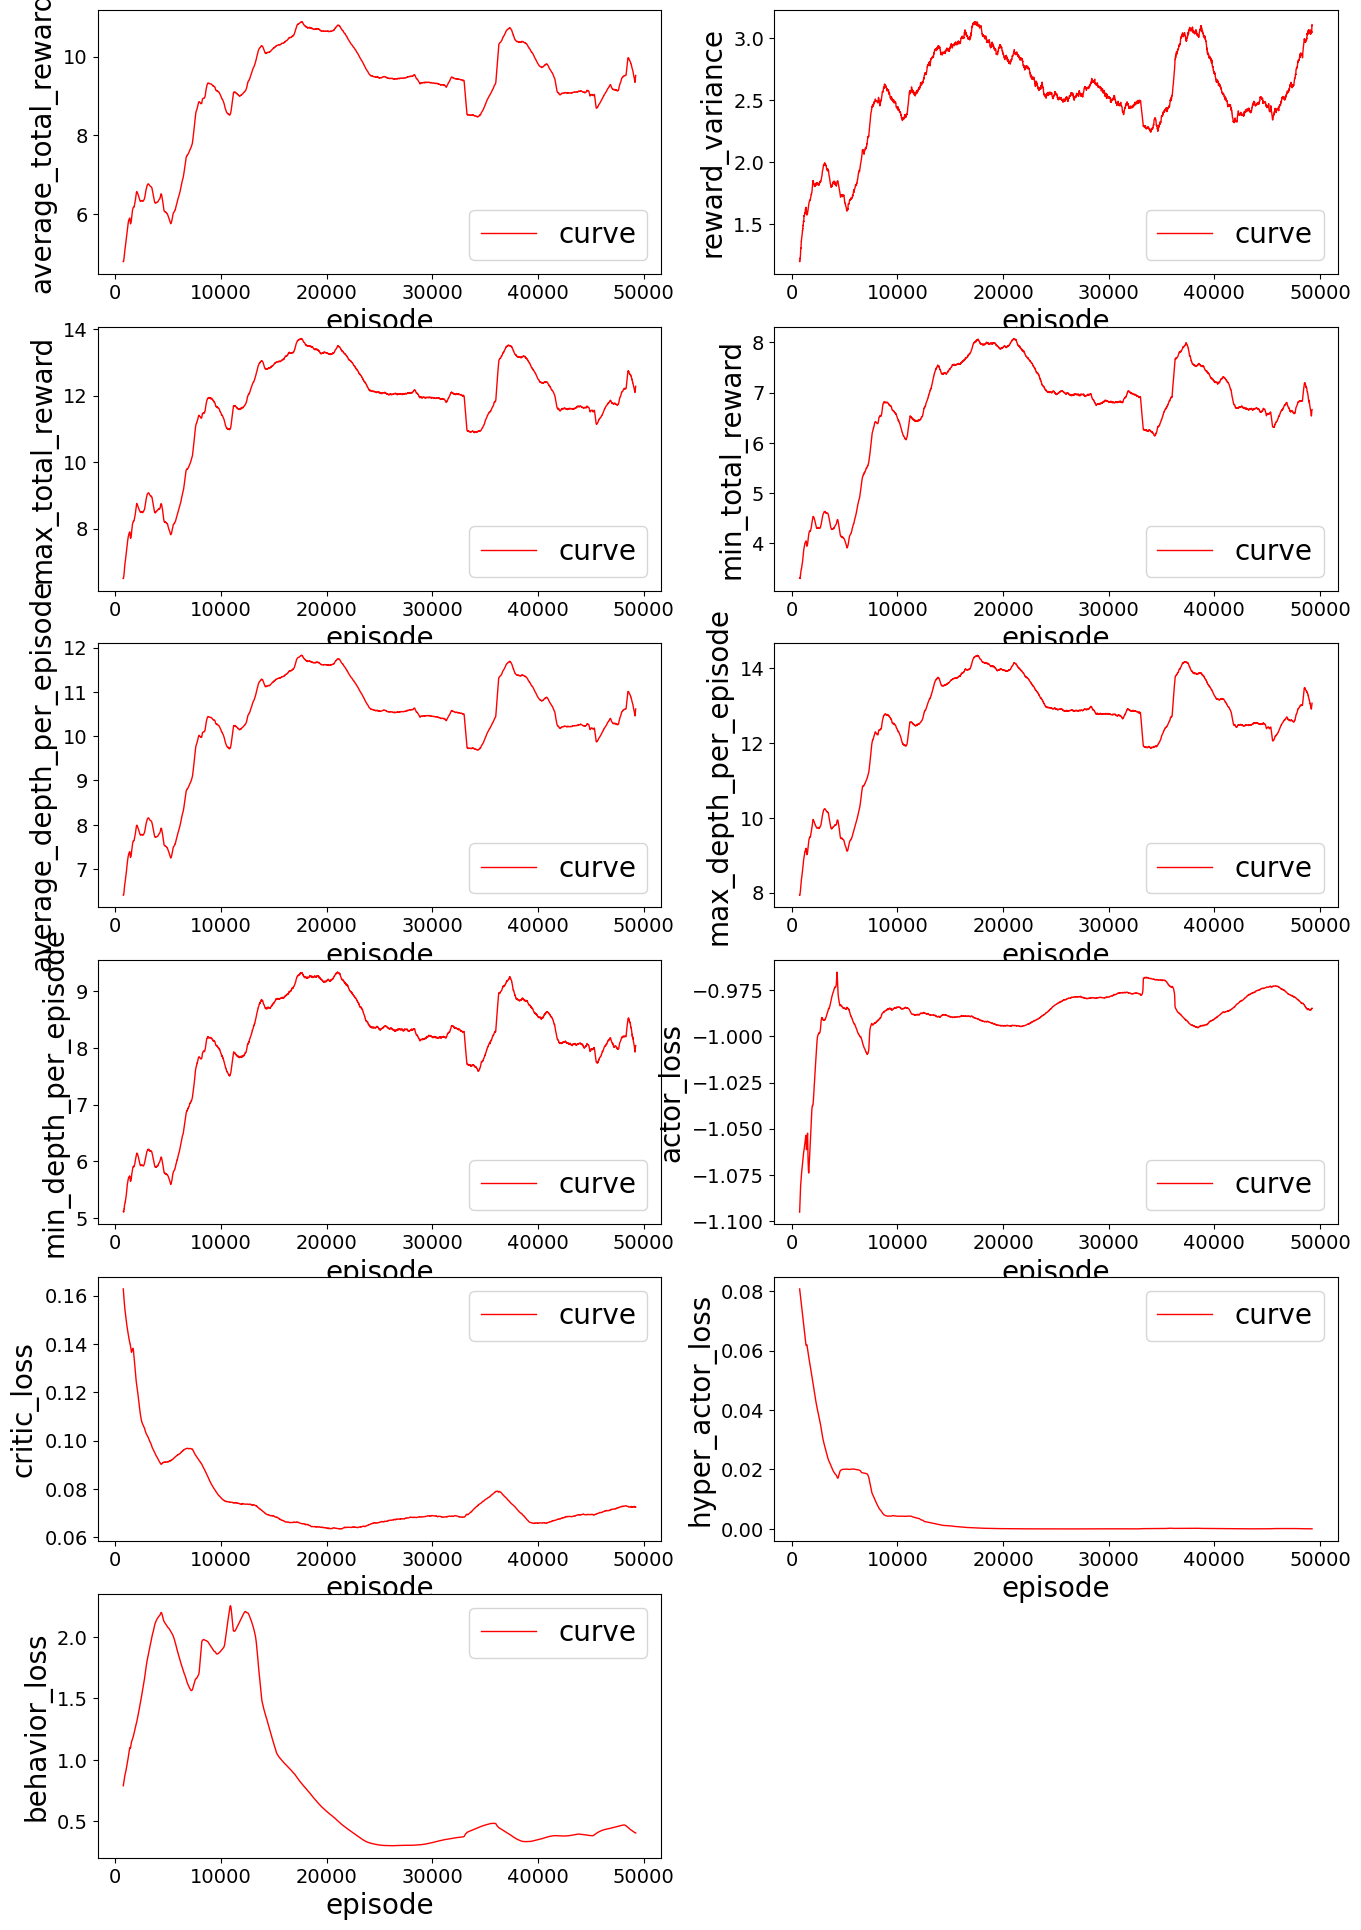

In [5]:
%matplotlib inline
from plot_utils import get_rl_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 300

SEED_list = [7]#[11,13,17]
seed_info = []
mean_result = {}
for SEED in SEED_list:
    expe = f"hac_SASRec_actor0.0001_critic0.001_behave0_hacoef0.1_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed{SEED}"
    log_path = "output/ml1m/agents/" + expe  + "/model.report"
    info = get_rl_training_info(log_path, ['actor_loss', 'critic_loss', 'hyper_actor_loss', 'behavior_loss'])
    for k in list(info.keys()):
        v = info[k]
        info[k] = smooth(np.array(v), smoothness)
            
        if k not in mean_result:
            mean_result[k] = info[k][-1]
        else:
            mean_result[k] += info[k][-1]
    seed_info.append(info)
print('\t'.join([k for k,v in mean_result.items()]))
print('\t'.join([str(v/len(SEED_list)) for k,v in mean_result.items()]))
plot_mean_var_line(["curve"], [seed_info], x_name = 'episode')

## Model Comparison

### Supervision Learning Rate

In [9]:
from plot_utils import *
import matplotlib.pyplot as plt
import numpy as np
FS = 24
plt.rcParams['font.size'] = FS

hac_info_list = []
plot_key = ['average_total_reward', 'reward_variance', 'actor_loss', 'critic_loss', 'behavior_loss', 'hyper_actor_loss']
plot_key_dict = {'average_total_reward': 'Total Reward', 
                 'reward_variance': 'Reward Variance', 
                 'actor_loss': '$\mathcal{L}_\mathrm{QMax}$', 
                 'critic_loss': '$\mathcal{L}_\mathrm{TD}$', 
                 'behavior_loss': '$\mathcal{L}_\mathrm{BCE}$', 
                 'hyper_actor_loss': '$\mathcal{L}_\mathrm{Hyper}$',
                 'episode': 'iteration'}
model_list = ['hac_SASRec_actor0.0001_critic0.001_behave0_hacoef1_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed',
              'hac_SASRec_actor0.0001_critic0.001_behave0.00005_hacoef1_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed']
#               'hac_SASRec_actor0.0001_critic0.001_behave0.00005_hacoef0.3_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed',
for model_path in model_list:
    hac_info = get_model_training_info(model_path, get_rl_training_info, 1000, 
                                       observe = ['actor_loss', 'critic_loss', 'hyper_actor_loss', 'behavior_loss'])
    for seed_hac_info in hac_info:
        for k in ['critic_loss', 'hyper_actor_loss', 'behavior_loss']:
            v = np.array(seed_hac_info[k]) + 1e-6
            if '_loss' in k:
                seed_hac_info[k] = np.log(v)
    hac_info = [{plot_key_dict[k]:v for k,v in seed_hac_info.items() if k in plot_key_dict} for seed_hac_info in hac_info]
    hac_info_list.append(hac_info)

plot_mean_var_line([f'$\lambda_h$={ha}' for ha in [1,0.1,0]], 
                   hac_info_list[::-1], x_name = 'iteration', with_x = False, 
                   font_size = FS, legend_idx = 5)

FileNotFoundError: [Errno 2] No such file or directory: 'output/rl4rs/agents/hac_SASRec_actor0.0001_critic0.001_behave0_hacoef1_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed11/model.report'

### Alignment Learning Rate

5000it [00:00, 11803.67it/s]
5000it [00:00, 15877.99it/s]
5000it [00:00, 10197.80it/s]
5000it [00:00, 13989.55it/s]


episode	average_total_reward	reward_variance	max_total_reward	min_total_reward	average_depth_per_episode	max_depth_per_episode	min_depth_per_episode	actor_loss	critic_loss	hyper_actor_loss	behavior_loss
47490.0	9.351219138123753	5.956822638113772	11.569216910628741	4.258910119478542	10.429141716566866	12.40369261477046	5.958582834331336	-1.0859661429912268	0.08080284377314176	0.0	0.1776664978231558


5000it [00:00, 15785.69it/s]
5000it [00:00, 7216.85it/s]
5000it [00:00, 11799.71it/s]
5000it [00:00, 14734.08it/s]


episode	average_total_reward	reward_variance	max_total_reward	min_total_reward	average_depth_per_episode	max_depth_per_episode	min_depth_per_episode	actor_loss	critic_loss	hyper_actor_loss	behavior_loss
47490.0	9.506687652894211	5.546763585409456	11.484636012624751	4.90115341004491	10.542065868263473	12.318862275449101	6.5	-1.03396613433392	0.0754995185601852	0.018578375021668092	0.15861970443648477


5000it [00:00, 12220.14it/s]
5000it [00:00, 11954.90it/s]
5000it [00:00, 11466.11it/s]
5000it [00:00, 15589.96it/s]


episode	average_total_reward	reward_variance	max_total_reward	min_total_reward	average_depth_per_episode	max_depth_per_episode	min_depth_per_episode	actor_loss	critic_loss	hyper_actor_loss	behavior_loss
47490.0	9.377546491267465	5.941148147587624	11.565551930638723	4.504480070394211	10.435279441117764	12.393213572854291	6.152195608782435	-0.9829448497878339	0.07128089347825443	1.3188222956484584e-06	0.19142418871587236


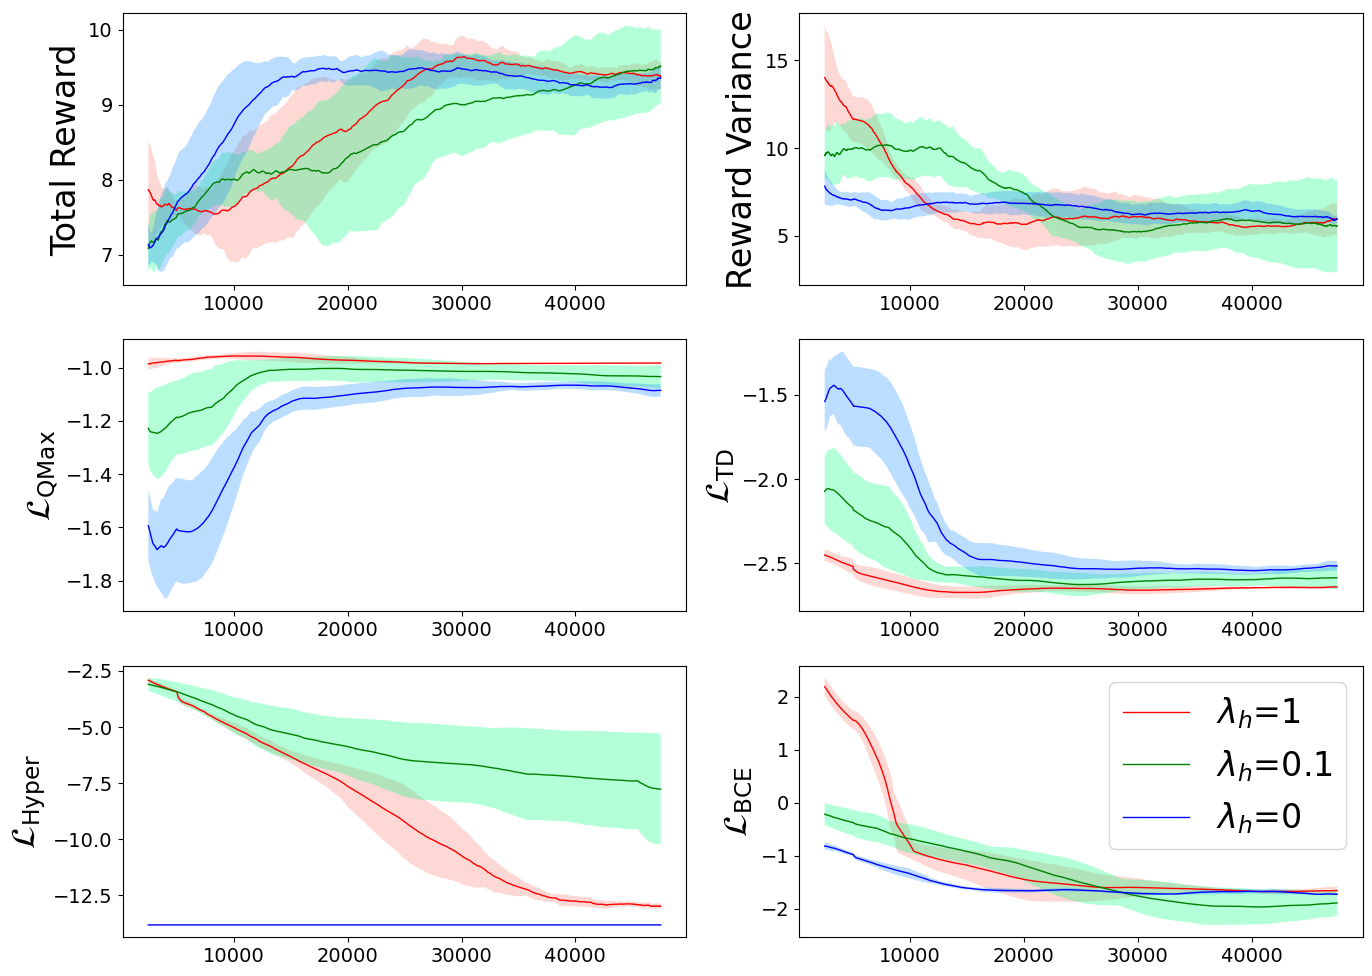

In [1]:
from plot_utils import *
import matplotlib.pyplot as plt
import numpy as np
FS = 24
plt.rcParams['font.size'] = FS

hac_info_list = []
plot_key = ['average_total_reward', 'reward_variance', 'actor_loss', 'critic_loss', 'behavior_loss', 'hyper_actor_loss']
plot_key_dict = {'average_total_reward': 'Total Reward', 
                 'reward_variance': 'Reward Variance', 
                 'actor_loss': '$\mathcal{L}_\mathrm{QMax}$', 
                 'critic_loss': '$\mathcal{L}_\mathrm{TD}$', 
                 'behavior_loss': '$\mathcal{L}_\mathrm{BCE}$', 
                 'hyper_actor_loss': '$\mathcal{L}_\mathrm{Hyper}$',
                 'episode': 'iteration'}
model_list = ['hac_SASRec_actor0.0001_critic0.001_behave0.00005_hacoef0_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed',
              'hac_SASRec_actor0.0001_critic0.001_behave0.00005_hacoef0.1_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed',
              'hac_SASRec_actor0.0001_critic0.001_behave0.00005_hacoef1_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed']
#               'hac_SASRec_actor0.0001_critic0.001_behave0.00005_hacoef0.3_niter50000_reg0.00001_ep0_noise0.1_bs64_epbs32_step20_topk1_seed',
for model_path in model_list:
    hac_info = get_model_training_info(model_path, get_rl_training_info, 1000, 
                                       observe = ['actor_loss', 'critic_loss', 'hyper_actor_loss', 'behavior_loss'],
                                       SEED_list = [11,13,17,19,23])
    for seed_hac_info in hac_info:
        for k in ['critic_loss', 'hyper_actor_loss', 'behavior_loss']:
            v = np.array(seed_hac_info[k]) + 1e-6
            if '_loss' in k:
                seed_hac_info[k] = np.log(v)
    hac_info = [{plot_key_dict[k]:v for k,v in seed_hac_info.items() if k in plot_key_dict} for seed_hac_info in hac_info]
    hac_info_list.append(hac_info)

plot_mean_var_line([f'$\lambda_h$={ha}' for ha in [1,0.1,0]], 
                   hac_info_list[::-1], x_name = 'iteration', with_x = False, 
                   font_size = FS, legend_idx = 5)